### IMPORT LIBRARY

In [16]:
import pandas as pd  ##for data manipulation
import numpy as np   # for linear algebra 
import matplotlib.pyplot as plt #for creating static, interactive, and animated visualizations in various formats. 
import seaborn as sns # Python data visualization library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


### LOAD AND READ DATA

In [52]:
data = pd.read_csv("C:/Users/LAP ME/Desktop/data sets/apple_quality.csv")

### DATA EXPLORATION

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [54]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [55]:
data.dropna(inplace=True)

In [56]:
data.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [57]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [58]:
data["Acidity"].unique()

array(['-0.491590483', '-0.722809367', '2.621636473', ..., '-1.334611391',
       '-2.229719806', '1.599796456'], dtype=object)

In [59]:
data.shape

(4000, 9)

In [60]:
data["Quality"].unique()

array(['good', 'bad'], dtype=object)

### DATA PREPROCESSING

In [61]:
mapper_quality={"good":1,"bad":0}
data["Quality"]=data["Quality"].map(mapper_quality)
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [62]:
data.drop("A_id",axis=1,inplace=True)
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


### VISUALIAZATION ON DATA

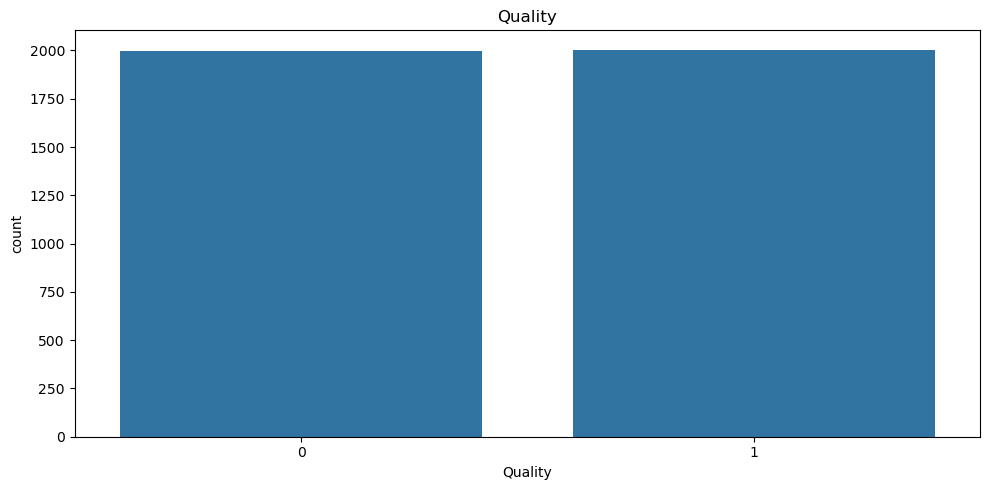

In [63]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['Quality'],data=data)
plt.title('Quality')
plt.tight_layout()
plt.show()

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


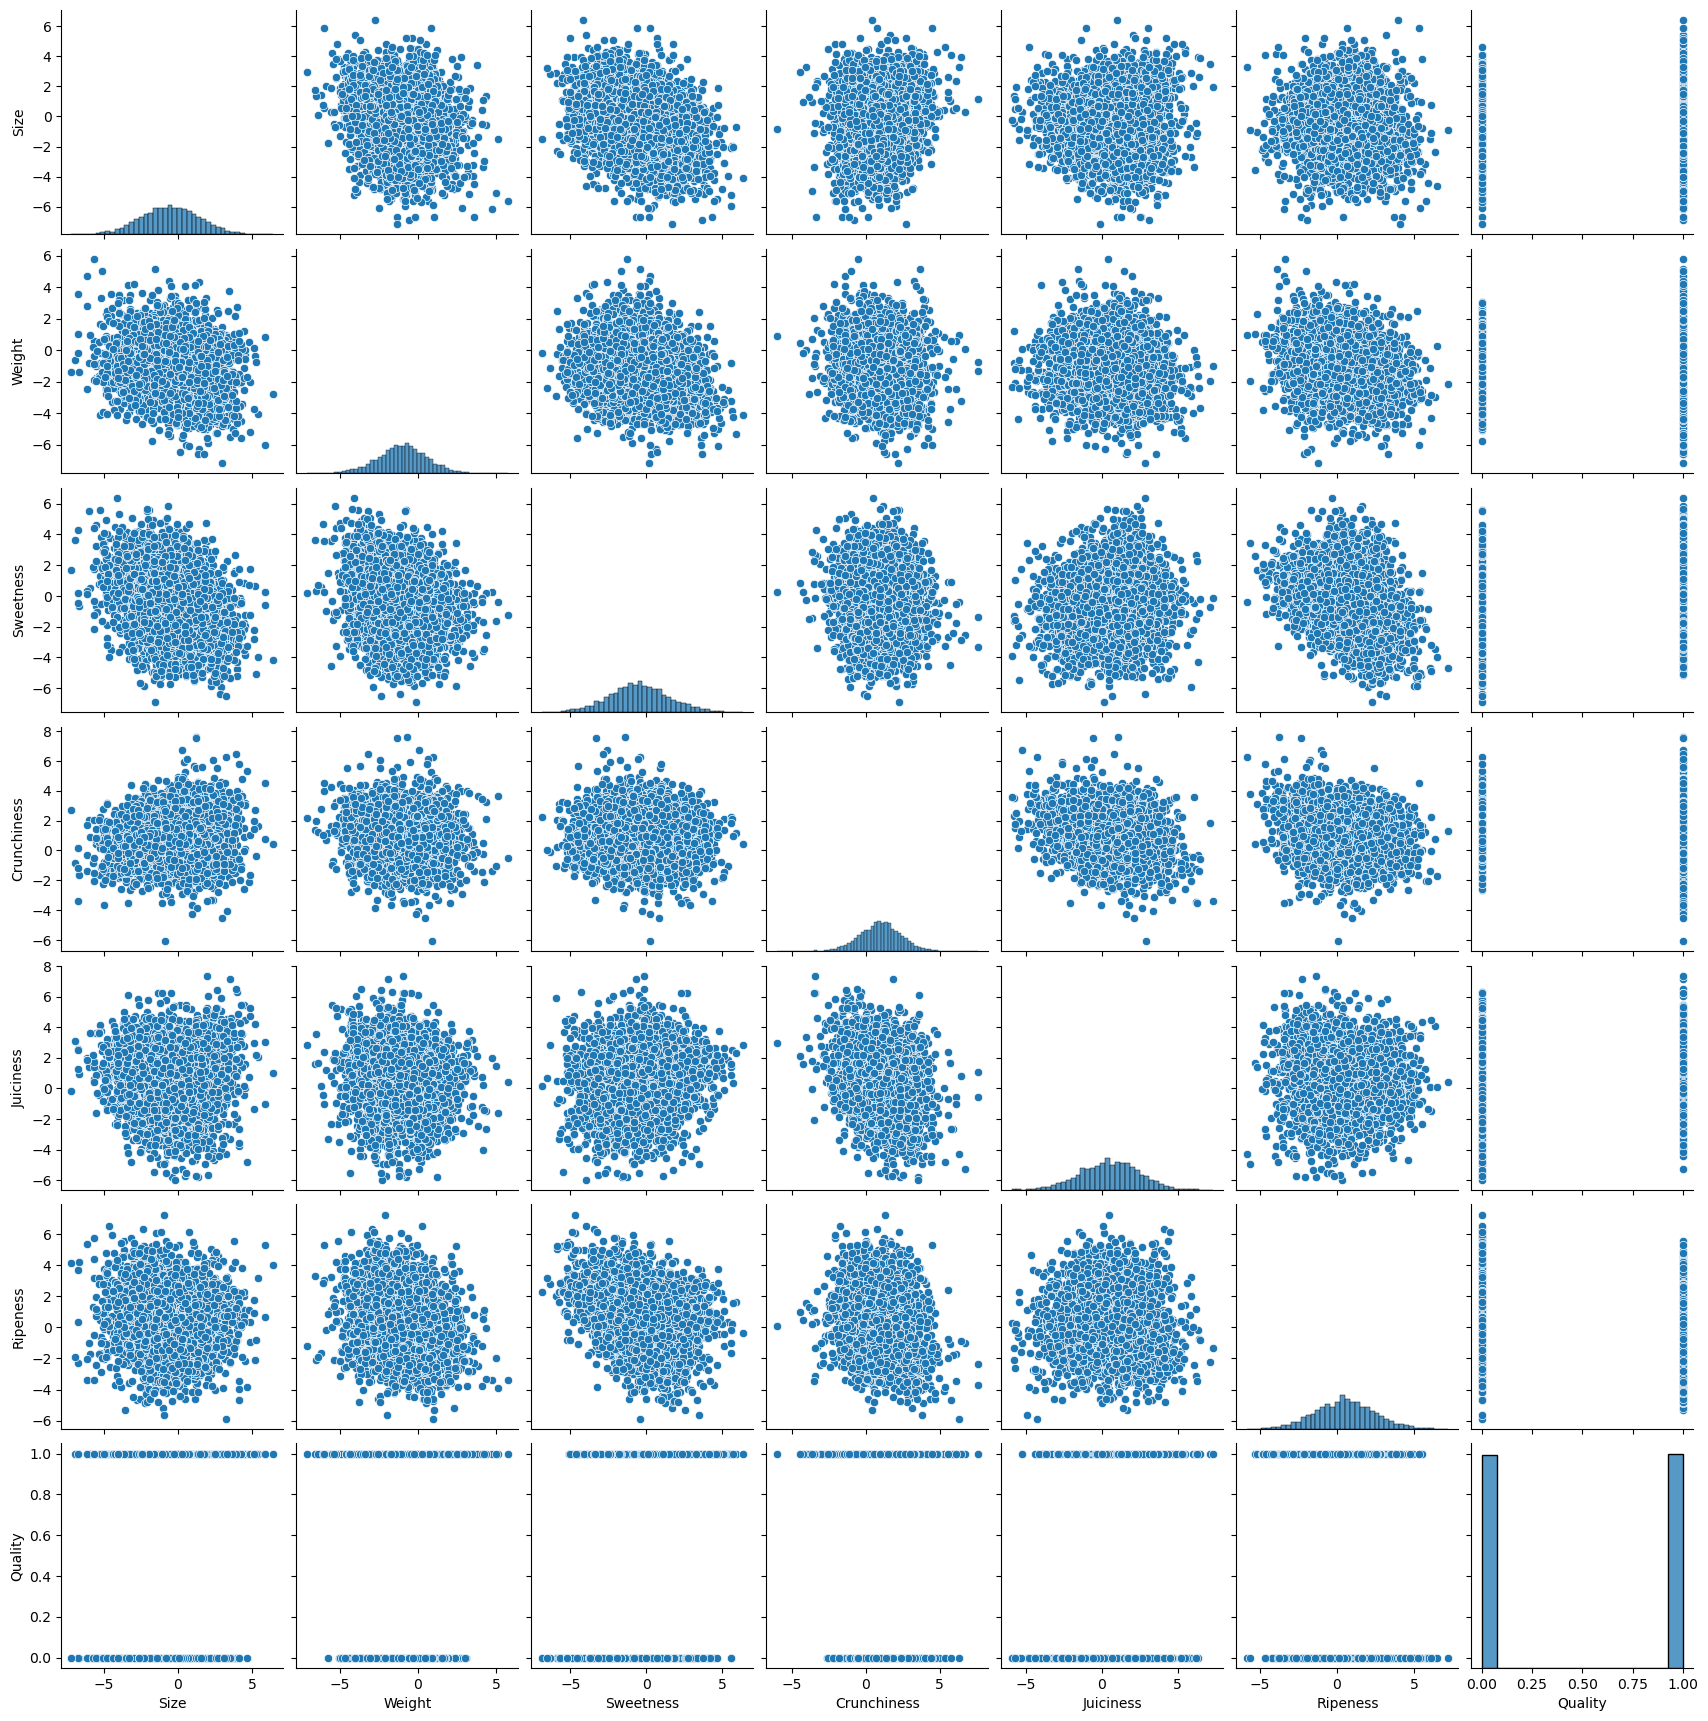

In [64]:
sns.pairplot(data)

<Axes: xlabel='Ripeness', ylabel='count'>

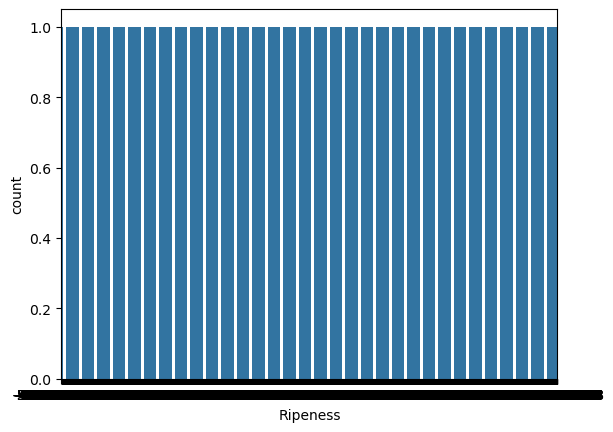

In [65]:
sns.countplot(data=data,x='Ripeness') #  countplot for Frequency Counts & Data Exploration

<Axes: >

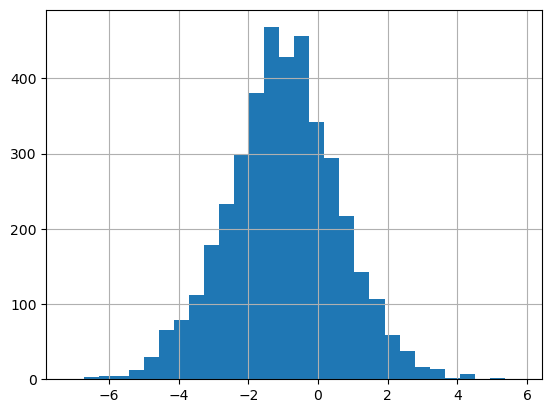

In [33]:
data['Weight'].hist(bins=30) # histplot  for Visualizing Data Distribution 

<Axes: xlabel='Weight', ylabel='Sweetness'>

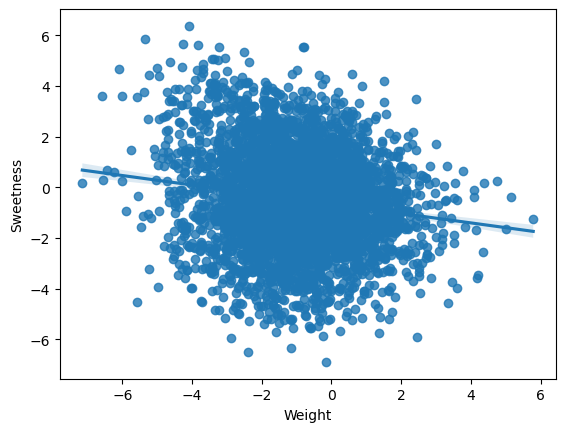

In [66]:
sns.regplot(data=data,x="Weight",y="Sweetness") 

<Axes: xlabel='Weight', ylabel='Sweetness'>

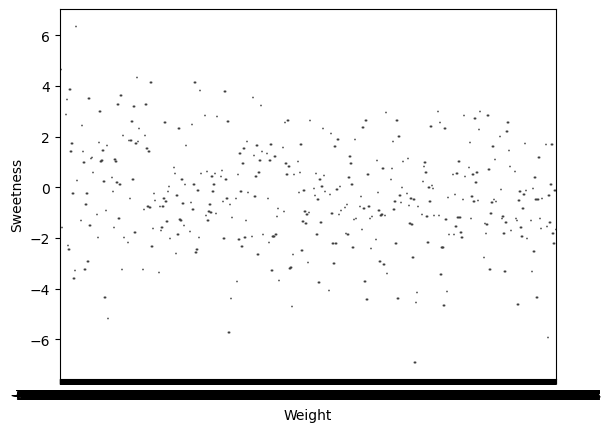

In [68]:
sns.boxplot(data=data,x="Weight",y="Sweetness") # boxplot for Identification of Outliers

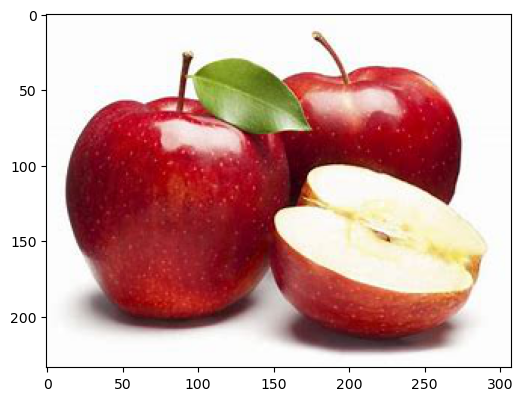

In [67]:
import matplotlib.image as img
plt.figure(figsize = (6,5))
image = img.imread("C:/Users/LAP ME/Downloads/OIP.jpeg")
plt.imshow(image)

### SPLIT DATA

In [69]:
x = data.drop('Quality' , axis =1)

In [70]:
y=data['Quality']

In [71]:
x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [72]:
y

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

In [73]:

x_train , x_test , y_train , y_test = train_test_split (x,y,test_size = .3 ,shuffle = True , random_state =42)

In [74]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (2800, 7)
y_train shape =  (2800,)
x_test shape =  (1200, 7)
y_test shape =  (1200,)


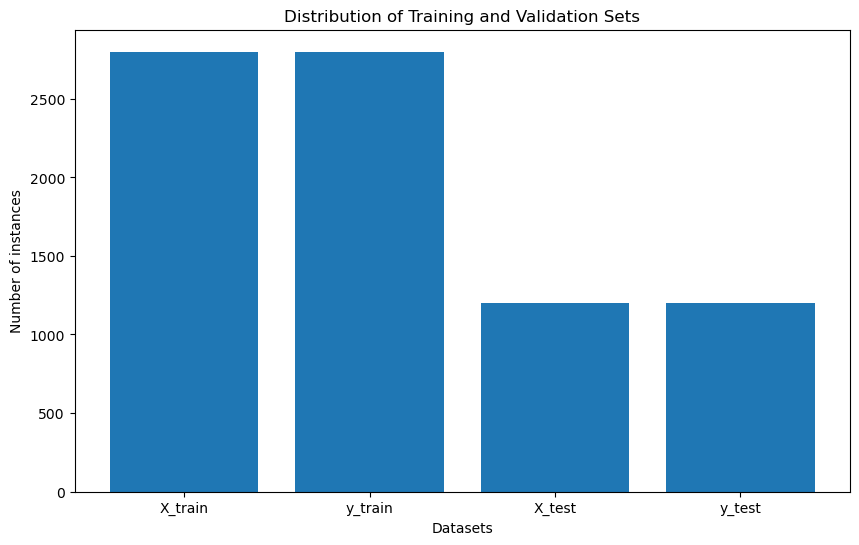

In [75]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(10, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

### SCALING DATA

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### EVALUATION MODEL

In [78]:
lr_model=LogisticRegression() # call model


In [79]:
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [81]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
 con= confusion_matrix(y_test,y_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis

<Axes: >

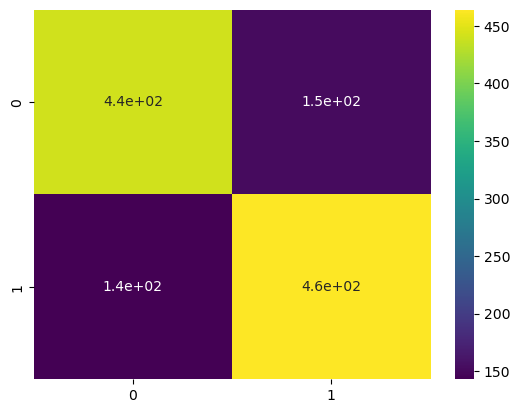

In [84]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

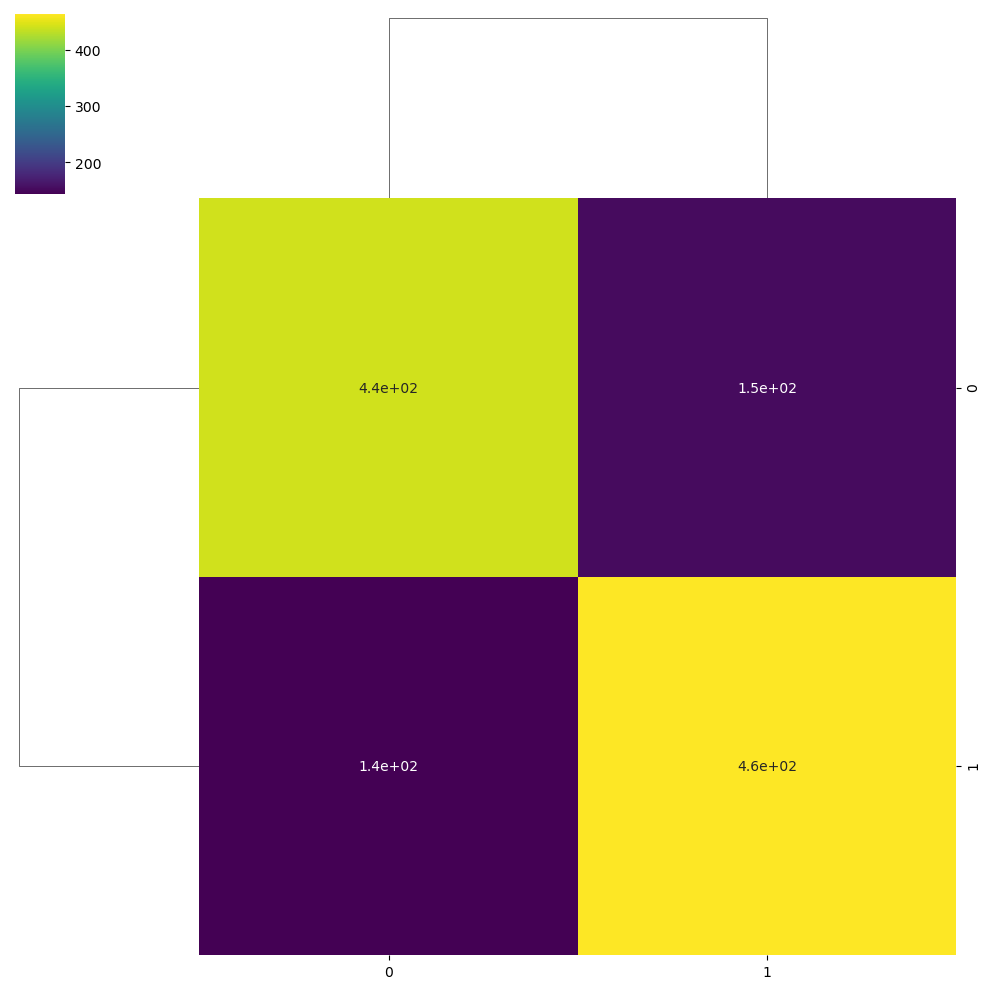

In [85]:
sns.clustermap(con, annot=True, cmap='viridis', cbar=True) # clustermap for Discovering Patterns and Relationships

In [86]:
from sklearn.metrics import classification_report # for Precision and Recall Analysis

In [87]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.76      0.74      0.75       593
           1       0.75      0.76      0.76       607

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



### KNN MODEL

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn_model = KNeighborsClassifier()

In [90]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [91]:
knn_pred = knn_model.predict(x_test)

In [92]:
knn_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [93]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       593
           1       0.90      0.89      0.90       607

    accuracy                           0.90      1200
   macro avg       0.89      0.90      0.89      1200
weighted avg       0.90      0.90      0.90      1200



### GUISSIONNB MODEL

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
nb_model=GaussianNB()

In [96]:
nb_model.fit(x_train,y_train)

GaussianNB()

In [97]:
y_pred = nb_model.predict(x_test)

In [98]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       593
           1       0.76      0.75      0.75       607

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

